In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

2022-10-08 12:24:35.560199: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-08 12:24:35.560248: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense

In [3]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [4]:
# specifically for cnn
from keras.layers import Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [5]:
from tqdm.notebook import tqdm

# Prepare Dataset for Training

In [6]:
import os

IMAGES_DIR = './data/Images/'
breed_list = os.listdir(IMAGES_DIR)

print(f"Il y a {len(breed_list)} races")

images_by_breed = {breed.split('-')[-1] : len(os.listdir(f"{IMAGES_DIR}/{breed}")) for breed in breed_list}
total_images = sum([v for k,v in images_by_breed.items()])

print(f"Il y a un total de {total_images} d'images")

Il y a 120 races
Il y a un total de 20430 d'images


In [7]:
IMG_SIZE = 150
nb_class = 10

In [8]:
le = LabelEncoder()

def get_training(nb_class):
    X = list()
    Z = list()
    
    def make_train_data(breed_name,DIR):
        for img in tqdm(os.listdir(DIR)):
            path = os.path.join(DIR,img)
            img = cv2.imread(path, cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
            X.append(np.array(img))
            Z.append(str(breed_name))
        
    for breed in breed_list[:nb_class]:
        name = breed.split('-')[-1]
        img_dir = f"{IMAGES_DIR}/{breed}/"
        make_train_data(name, img_dir)
    
    # converting labels to categorical data
    Y = le.fit_transform(Z)
    Y = to_categorical(Y, nb_class)
    
    # Normalising X
    X = np.array(X) #.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
    X = X.astype('float32')
    X = X/255
    
    return X, Y

In [9]:
X,Y = get_training(nb_class)

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/159 [00:00<?, ?it/s]

  0%|          | 0/148 [00:00<?, ?it/s]

  0%|          | 0/151 [00:00<?, ?it/s]

  0%|          | 0/153 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/159 [00:00<?, ?it/s]

  0%|          | 0/159 [00:00<?, ?it/s]

In [10]:
len(X), len(Y)

(1583, 1583)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [12]:
np.random.seed(42)
rn.seed(42)

In [13]:
# # modelling starts using a CNN.
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation ='relu', input_shape = (IMG_SIZE, IMG_SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(nb_class, activation = "softmax"))

2022-10-08 12:24:42.859714: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jupyter/.cache/pypoetry/virtualenvs/openclassroom-KKh1tyRT-py3.9/lib/python3.9/site-packages/cv2/../../lib64:
2022-10-08 12:24:42.859769: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-08 12:24:42.859794: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (noota-nlp-v4-nogpu): /proc/driver/nvidia/version does not exist
2022-10-08 12:24:42.860119: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with th

Reduce learning rate when a metric has stopped improving.

Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.

In [14]:
batch_size=16
epochs=20

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.1)

# Data augmentation

In [15]:
# TODO Presentation : Show whitening / Rotation and image example 

In [16]:
# batch : Whitening 

In [17]:
from skimage import exposure

In [18]:
## whitening

In [19]:
## Rotation

def rotation_range(x, rotation_range):
    
    def transform_matrix_offset_center(matrix, x, y):
        o_x = float(x) / 2 - 0.5
        o_y = float(y) / 2 - 0.5
        offset_matrix = np.array([[1, 0, o_x], [0, 1, o_y], [0, 0, 1]])
        reset_matrix = np.array([[1, 0, -o_x], [0, 1, -o_y], [0, 0, 1]])
        transform_matrix = np.dot(np.dot(offset_matrix, matrix), reset_matrix)
        return transform_matrix

    theta = np.pi / 180 * np.random.uniform(-rotation_range, rotation_range)
    
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta), 0],
                                    [np.sin(theta), np.cos(theta), 0],
                                    [0, 0, 1]])
    
    transform_matrix = rotation_matrix

    h, w = x.shape[img_row_axis], x.shape[img_col_axis]
    
    transform_matrix = transform_matrix_offset_center(transform_matrix, h, w)
    
    x = apply_transform(x, transform_matrix, img_channel_axis,
                            fill_mode='nearest', cval=0.0)

In [20]:
## Equalization

In [21]:
def AHE(img):
    img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03) 
    return img_adapteq

def histogram_equalization(img):
    img_adapteq = exposure.equalize_hist(img) #####
    return img_adapteq

def contrast_stretching(img):
    p2, p98 = np.percentile(img, (2, 98)) #####
    img_adapteq = exposure.rescale_intensity(img, in_range=(p2, p98)) #####
    return img_adapteq

In [22]:
def equalization_test(fct):
    datagen_equalize = ImageDataGenerator(preprocessing_function=fct)
    x_ex, y_ex = x_train[:10], y_train[:10]
    # fit parameters from data
    datagen_equalize.fit(x_ex)
    img_rows, img_cols = 150,150
    # Configure batch size and retrieve one batch of images
    for X_batch, y_batch in datagen_equalize.flow(x_ex, y_ex, batch_size=9):
        # Show 9 images
        for i in range(0, 9):
            plt.subplot(330 + 1 + i)
            plt.imshow(X_batch[i].reshape(img_rows, img_cols, 3))
        # show the plot
        plt.show()
        break

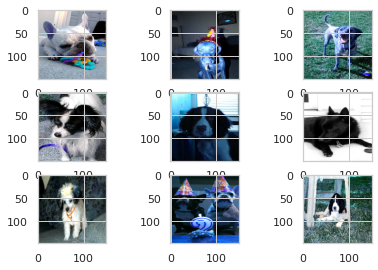

In [23]:
equalization_test(contrast_stretching)

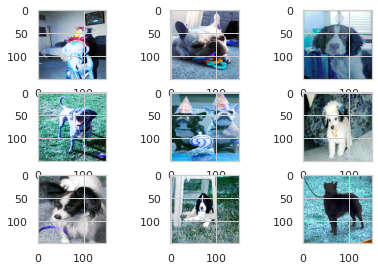

In [24]:
equalization_test(histogram_equalization)

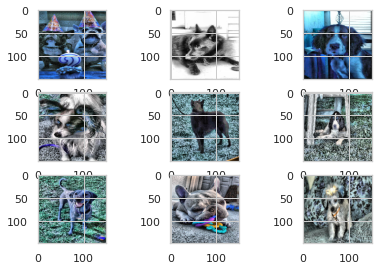

In [25]:
equalization_test(AHE)

In [26]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)


Use sparse categorical crossentropy when your classes are mutually exclusive (e.g. when each sample belongs exactly to one class) and categorical crossentropy when one sample can have multiple classes or labels are soft probabilities (like [0.5, 0.3, 0.2]).

Formula for categorical crossentropy (S - samples, C - classess, s∈c - sample belongs to class c) is:

−1N∑s∈S∑c∈C1s∈clogp(s∈c)

For case when classes amodel.summary()re exclusive, you don't need to sum over them - for each sample only non-zero value is just −logp(s∈c) for true class c.

This allows to conserve time and memory. Consider case of 10000 classes when they are mutually exclusive - just 1 log instead of summing up 10000 for each sample, just one integer instead of 10000 floats.

Formula is the same in both cases, so no impact on accuracy should be there.

In [27]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 96)       0

In [29]:
# EZ mode: 
#model.fit(X_train, y_train, batch_size = batch_size, epochs = nb_epochs, verbose = 1, validation_data = (X_test, y_test))
# Badass mode : 
History = model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size),
                              epochs = epochs, validation_data = (x_test, y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/20
79/79 [==============================] - 22s 270ms/step - loss: 2.3051 - accuracy: 0.1152 - val_loss: 2.2877 - val_accuracy: 0.1262
Epoch 2/20
79/79 [==============================] - 21s 261ms/step - loss: 2.3018 - accuracy: 0.1136 - val_loss: 2.2986 - val_accuracy: 0.1262
Epoch 3/20
79/79 [==============================] - 21s 259ms/step - loss: 2.2411 - accuracy: 0.1608 - val_loss: 2.2222 - val_accuracy: 0.1609
Epoch 4/20
79/79 [==============================] - 21s 269ms/step - loss: 2.1306 - accuracy: 0.2280 - val_loss: 1.9812 - val_accuracy: 0.2744
Epoch 5/20
79/79 [==============================] - 21s 260ms/step - loss: 2.0142 - accuracy: 0.2640 - val_loss: 1.8405 - val_accuracy: 0.3281
Epoch 6/20
79/79 [==============================] - 21s 259ms/step - loss: 1.9400 - accuracy: 0.2744 - val_loss: 1.7896 - val_accuracy: 0.3722
Epoch 7/20
79/79 [==============================] - 21s 266ms/step - loss: 1.8729 - accuracy: 0.3048 - val_loss: 1.7575 - val_accuracy: 0.3502

# Evaluation of the model :

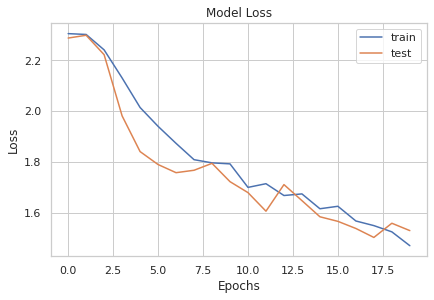

In [30]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

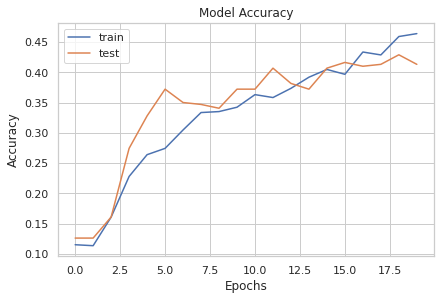

In [31]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

# Visualisation

In [32]:
x_test[:1].shape, x_test[1].reshape(-1, IMG_SIZE, IMG_SIZE, 3).shape

((1, 150, 150, 3), (1, 150, 150, 3))

In [33]:
model.predict(x_test[:2].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

array([[1.0171229e-03, 2.5428757e-02, 6.8167552e-05, 2.2927471e-01,
        2.0827112e-01, 1.2427222e-01, 1.8444201e-05, 1.9645127e-02,
        1.3955261e-01, 2.5245172e-01],
       [1.3019831e-02, 1.6417885e-01, 2.0951854e-01, 1.7362584e-03,
        8.3074793e-03, 4.1045099e-03, 3.2605448e-01, 2.2063567e-01,
        5.1796671e-02, 6.4772501e-04]], dtype=float32)

In [34]:
# getting predictions on val set.
pred = model.predict(x_test)
pred_digits = np.argmax(pred,axis=1)

In [35]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

In [68]:
breed_list

['n02102177-Welsh_springer_spaniel',
 'n02100583-vizsla',
 'n02113799-standard_poodle',
 'n02090379-redbone',
 'n02113624-toy_poodle',
 'n02101006-Gordon_setter',
 'n02086910-papillon',
 'n02104365-schipperke',
 'n02102040-English_springer',
 'n02108915-French_bulldog',
 'n02106166-Border_collie',
 'n02086646-Blenheim_spaniel',
 'n02093859-Kerry_blue_terrier',
 'n02106662-German_shepherd',
 'n02110806-basenji',
 'n02097298-Scotch_terrier',
 'n02096294-Australian_terrier',
 'n02106382-Bouvier_des_Flandres',
 'n02106030-collie',
 'n02098286-West_Highland_white_terrier',
 'n02087394-Rhodesian_ridgeback',
 'n02110063-malamute',
 'n02092339-Weimaraner',
 'n02113712-miniature_poodle',
 'n02112018-Pomeranian',
 'n02112137-chow',
 'n02112350-keeshond',
 'n02115913-dhole',
 'n02111889-Samoyed',
 'n02102973-Irish_water_spaniel',
 'n02091032-Italian_greyhound',
 'n02088364-beagle',
 'n02093991-Irish_terrier',
 'n02107142-Doberman',
 'n02107574-Greater_Swiss_Mountain_dog',
 'n02107683-Bernese_moun

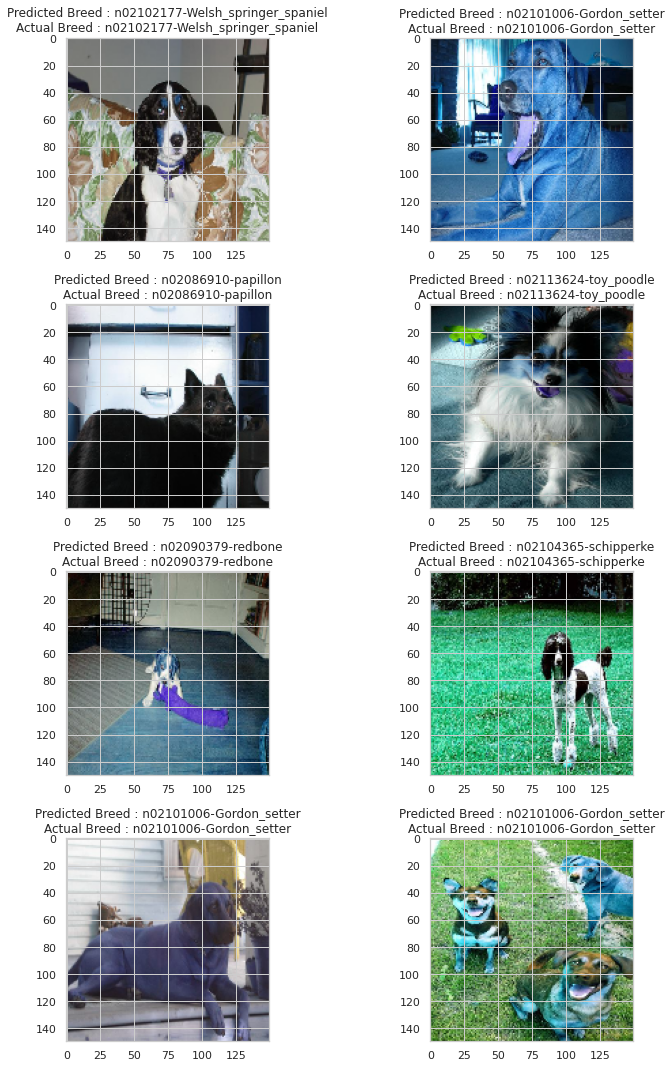

In [36]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Breed : "+str(breed_list[pred_digits[prop_class[count]]])+"\n"+"Actual Breed : "+str(breed_list[np.argmax([y_test[prop_class[count]]])]))
        plt.tight_layout()
        count+=1

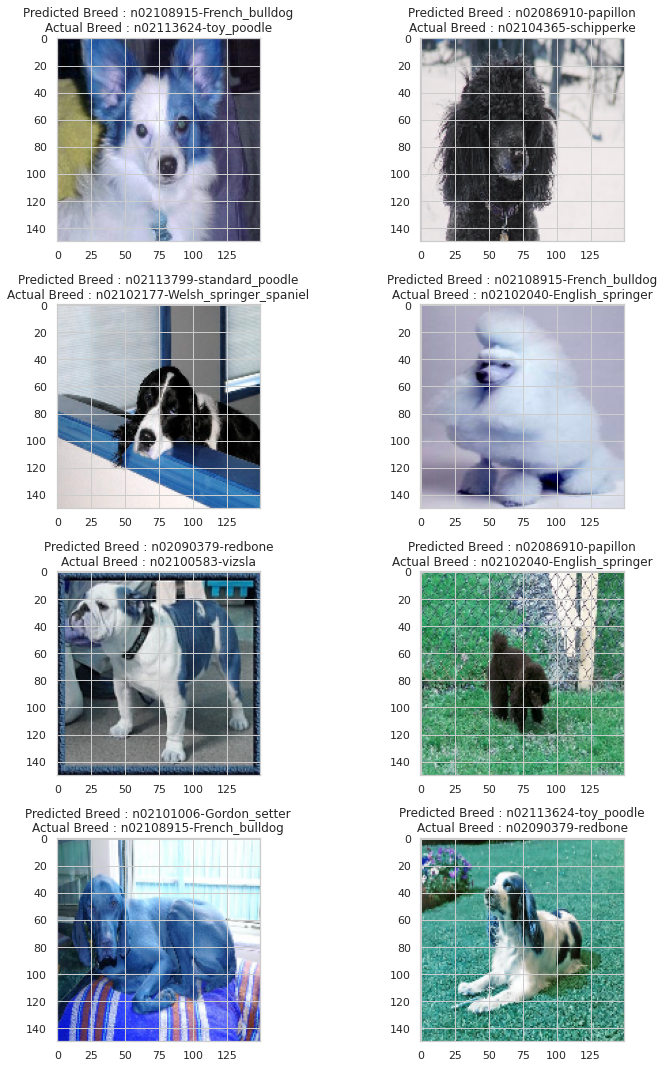

In [37]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Breed : "+str(breed_list[pred_digits[mis_class[count]]])+"\n"+"Actual Breed : "+str(breed_list[np.argmax([y_test[mis_class[count]]])]))
        plt.tight_layout()
        count+=1

In [ ]:
x_test

In [38]:
len(x_test)

317

In [39]:
model.predict(x_test)

array([[1.0171229e-03, 2.5428757e-02, 6.8167552e-05, ..., 1.9645127e-02,
        1.3955261e-01, 2.5245172e-01],
       [1.3019831e-02, 1.6417885e-01, 2.0951854e-01, ..., 2.2063562e-01,
        5.1796671e-02, 6.4772501e-04],
       [1.8537290e-01, 2.1885541e-01, 4.4484416e-01, ..., 2.2446701e-02,
        7.9027610e-03, 1.0201362e-03],
       ...,
       [2.2877507e-04, 7.2852341e-03, 1.6748815e-04, ..., 1.8655462e-02,
        6.4393952e-02, 4.4453377e-01],
       [1.9419227e-03, 4.6401348e-02, 2.7840936e-01, ..., 2.9598665e-01,
        4.4885922e-02, 2.2797114e-03],
       [1.2983942e-01, 1.5651250e-01, 1.3944903e-01, ..., 9.8834030e-02,
        4.4113509e-02, 2.2314196e-04]], dtype=float32)

# Pretrained model

In [40]:
import tensorflow_hub as hub

In [41]:
from keras import layers

In [42]:
IMG_SIZE = 224
nb_class = 10

In [43]:
X,Y = get_training(nb_class)

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/159 [00:00<?, ?it/s]

  0%|          | 0/148 [00:00<?, ?it/s]

  0%|          | 0/151 [00:00<?, ?it/s]

  0%|          | 0/153 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/159 [00:00<?, ?it/s]

  0%|          | 0/159 [00:00<?, ?it/s]

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [45]:
#setup input shape into the model
# Note : Need shape to be more than 224 

INPUT_SHAPE = [None,IMG_SIZE, IMG_SIZE, 3] #batch, height, width, colour channel

#setup output shape of our model
OUTPUT_SHAPE = nb_class

In [46]:
from tensorflow.keras.applications.vgg16 import VGG16

if IMG_SIZE < 224 :
    raise BaseException('The model starts working with the size 224')
    
base_model = VGG16(input_shape = (IMG_SIZE, IMG_SIZE, 3), # Shape of our images
                    include_top = False, # Leave out the last fully connected layer
                    weights = 'imagenet')

In [47]:
for layer in base_model.layers:
    layer.trainable = False

In [50]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(OUTPUT_SHAPE, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

In [51]:
#vgghist = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 10)
batch_size = 32
epochs = 10

vgghist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/10
39/39 [==============================] - 185s 5s/step - loss: 0.3561 - acc: 0.1783 - val_loss: 0.2788 - val_acc: 0.3407
Epoch 2/10
39/39 [==============================] - 183s 5s/step - loss: 0.2922 - acc: 0.3047 - val_loss: 0.2559 - val_acc: 0.4227
Epoch 3/10
39/39 [==============================] - 183s 5s/step - loss: 0.2690 - acc: 0.3922 - val_loss: 0.2372 - val_acc: 0.4637
Epoch 4/10
39/39 [==============================] - 185s 5s/step - loss: 0.2443 - acc: 0.4562 - val_loss: 0.2062 - val_acc: 0.5773
Epoch 5/10
39/39 [==============================] - 185s 5s/step - loss: 0.2331 - acc: 0.5089 - val_loss: 0.2024 - val_acc: 0.5647
Epoch 6/10
39/39 [==============================] - 183s 5s/step - loss: 0.2154 - acc: 0.5713 - val_loss: 0.1966 - val_acc: 0.5868
Epoch 7/10
39/39 [==============================] - 183s 5s/step - loss: 0.2036 - acc: 0.5786 - val_loss: 0.1957 - val_acc: 0.6088
Epoch 8/10
39/39 [==============================] - 184s 5s/step - loss: 0.2045 - a

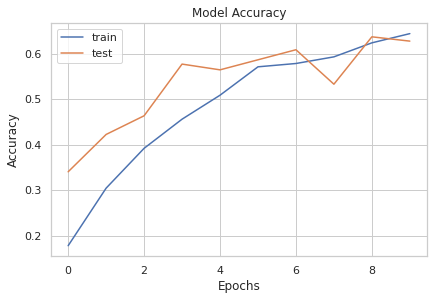

In [52]:
plt.plot(vgghist.history['acc'])
plt.plot(vgghist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

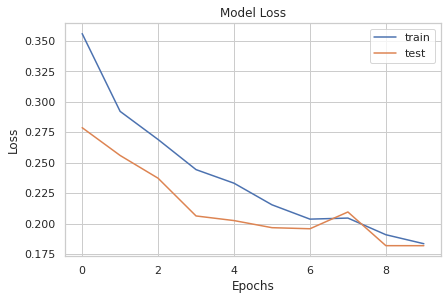

In [53]:
plt.plot(vgghist.history['loss'])
plt.plot(vgghist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

# DENSE 

In [54]:
from keras.applications.densenet import DenseNet121, preprocess_input

In [55]:
backbone = DenseNet121(input_shape = (IMG_SIZE, IMG_SIZE, 3), # Shape of our images
                        include_top = False, # Leave out the last fully connected layer
                        weights = 'imagenet')
x = backbone.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outp = layers.Dense(nb_class, activation="softmax")(x)

model = tf.keras.models.Model(backbone.input, outp)

In [56]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

In [ ]:
batch_size = 32

DenseNet121hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/10
39/39 [==============================] - 295s 7s/step - loss: 0.3390 - acc: 0.2982 - val_loss: 0.1769 - val_acc: 0.7161
Epoch 2/10
39/39 [==============================] - 265s 7s/step - loss: 0.1748 - acc: 0.6742 - val_loss: 0.1170 - val_acc: 0.7634
Epoch 3/10
39/39 [==============================] - 264s 7s/step - loss: 0.1088 - acc: 0.8266 - val_loss: 0.1043 - val_acc: 0.8139
Epoch 4/10
39/39 [==============================] - 264s 7s/step - loss: 0.0657 - acc: 0.9125 - val_loss: 0.0707 - val_acc: 0.8833
Epoch 5/10
39/39 [==============================] - 263s 7s/step - loss: 0.0466 - acc: 0.9506 - val_loss: 0.0480 - val_acc: 0.9338
Epoch 6/10
39/39 [==============================] - 266s 7s/step - loss: 0.0327 - acc: 0.9554 - val_loss: 0.0585 - val_acc: 0.9180
Epoch 7/10
39/39 [==============================] - 263s 7s/step - loss: 0.0221 - acc: 0.9797 - val_loss: 0.0657 - val_acc: 0.9243
Epoch 8/10
39/39 [==============================] - 266s 7s/step - loss: 0.0224 - a

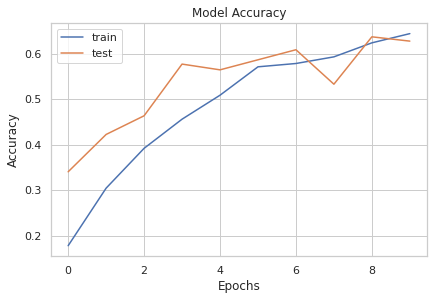

In [60]:
plt.plot(vgghist.history['acc'])
plt.plot(vgghist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

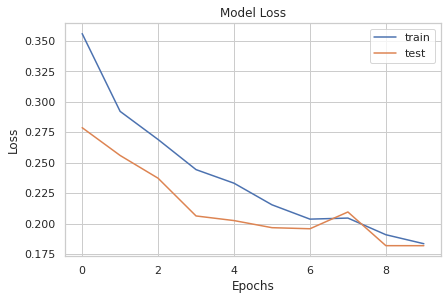

In [61]:
plt.plot(vgghist.history['loss'])
plt.plot(vgghist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()